In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("ueba.csv")

Избавимся от пропусков, удалив записи с ними

In [ ]:
df = data.dropna()

In [ ]:
df

,#,id,uid,domain,cn,department,title,who,logon_count,num_logons7,...,flag_password_cant_change,flag_dont_expire_password,owned_files,num_mailboxes,num_member_of_groups,num_member_of_indirect_groups,member_of_indirect_groups_ids,member_of_groups_ids,is_admin,is_service
0,1,872,S-1-5-21-3686381713-1037878038-1682765610-1877,dev.makves.ru,Цезарь Чикольба,Склад,Кладовщик/экспедитор,Ts.Chikolba,69,0,...,0,0,0,0,4,2,10;11,25;26;31;32,0.0,0
1,2,1534,S-1-5-21-3686381713-1037878038-1682765610-2544,dev.makves.ru,Тарас Шуфрич,Отдел продаж,Менеджер по продажам,T.Shufrich,56,0,...,0,0,0,0,4,2,10;11,25;26;49;50,0.0,0
2,3,7079,S-1-5-21-3686381713-1037878038-1682765610-8113,dev.makves.ru,Элоиза Муравьёва,Юридический отдел,Юрист/юрист-консульт,E.Muraveva,68,0,...,0,0,0,0,4,2,10;11,25;26;35;36,0.0,0
3,4,2037,S-1-5-21-3686381713-1037878038-1682765610-3049,dev.makves.ru,Юнона Симонова,Аппарат управления,Зместитель директора,Yu.Simonova,20,0,...,0,0,4,0,4,2,10;11,25;26;53;54,0.0,0
4,5,4012,S-1-5-21-3686381713-1037878038-1682765610-5032,dev.makves.ru,Нестор Чернов,Охрана труда,Охранник труда 2 степени,N.Chernov,54,0,...,0,0,0,0,4,2,10;11,25;26;41;42,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,2627,4521,S-1-5-21-3686381713-1037878038-1682765610-5542,dev.makves.ru,Еремей Брагин,Бухгалтерия,Бухгалтер,E.Bragin,51,0,...,0,0,0,0,4,2,10;11,25;26;51;52,0.0,0
2628,2629,5229,S-1-5-21-3686381713-1037878038-1682765610-6250,dev.makves.ru,Цезарь Выговский,Отдел закупок,Менеджер по торгам,Ts.Vygovskiy,55,0,...,0,0,0,0,4,2,10;11,25;26;47;48,0.0,0
2629,2630,1303,S-1-5-21-3686381713-1037878038-1682765610-2312,dev.makves.ru,Сергей Рябов,Аппарат управления,Зместитель директора,S.Ryabov,41,0,...,0,0,0,0,4,2,10;11,25;26;53;54,0.0,0
2630,2631,5647,S-1-5-21-3686381713-1037878038-1682765610-6670,dev.makves.ru,Тамара Алексеева,Охрана труда,Охранник труда 3 степени,T.Alekseeva,46,0,...,0,0,0,0,4,2,10;11,25;26;41;42,0.0,0


Избавимся от ненужных или константных признаков (принимающих одно и то же значение)

In [ ]:
df = df.drop(['id', '#'], axis = 1)

In [ ]:
start_text = 'S-1-5-21-3686381713-1037878038-1682765610-'
count = 0
for i in df['uid']:
  if start_text in i:
    count+=1
if count == len(df):
  df.drop(['uid'], axis = 1, inplace = True)

In [ ]:
df

,domain,cn,department,title,who,logon_count,num_logons7,num_share7,num_file7,num_ad7,...,flag_password_cant_change,flag_dont_expire_password,owned_files,num_mailboxes,num_member_of_groups,num_member_of_indirect_groups,member_of_indirect_groups_ids,member_of_groups_ids,is_admin,is_service
0,dev.makves.ru,Цезарь Чикольба,Склад,Кладовщик/экспедитор,Ts.Chikolba,69,0,0,0,0,...,0,0,0,0,4,2,10;11,25;26;31;32,0.0,0
1,dev.makves.ru,Тарас Шуфрич,Отдел продаж,Менеджер по продажам,T.Shufrich,56,0,0,0,0,...,0,0,0,0,4,2,10;11,25;26;49;50,0.0,0
2,dev.makves.ru,Элоиза Муравьёва,Юридический отдел,Юрист/юрист-консульт,E.Muraveva,68,0,0,0,0,...,0,0,0,0,4,2,10;11,25;26;35;36,0.0,0
3,dev.makves.ru,Юнона Симонова,Аппарат управления,Зместитель директора,Yu.Simonova,20,0,0,0,0,...,0,0,4,0,4,2,10;11,25;26;53;54,0.0,0
4,dev.makves.ru,Нестор Чернов,Охрана труда,Охранник труда 2 степени,N.Chernov,54,0,0,0,0,...,0,0,0,0,4,2,10;11,25;26;41;42,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,dev.makves.ru,Еремей Брагин,Бухгалтерия,Бухгалтер,E.Bragin,51,0,0,0,0,...,0,0,0,0,4,2,10;11,25;26;51;52,0.0,0
2628,dev.makves.ru,Цезарь Выговский,Отдел закупок,Менеджер по торгам,Ts.Vygovskiy,55,0,0,0,0,...,0,0,0,0,4,2,10;11,25;26;47;48,0.0,0
2629,dev.makves.ru,Сергей Рябов,Аппарат управления,Зместитель директора,S.Ryabov,41,0,0,0,0,...,0,0,0,0,4,2,10;11,25;26;53;54,0.0,0
2630,dev.makves.ru,Тамара Алексеева,Охрана труда,Охранник труда 3 степени,T.Alekseeva,46,0,0,0,0,...,0,0,0,0,4,2,10;11,25;26;41;42,0.0,0


Разобьем признаки на числовые и текстовые

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2632
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   domain                         2210 non-null   object 
 1   cn                             2210 non-null   object 
 2   department                     2210 non-null   object 
 3   title                          2210 non-null   object 
 4   who                            2210 non-null   object 
 5   logon_count                    2210 non-null   int64  
 6   num_logons7                    2210 non-null   int64  
 7   num_share7                     2210 non-null   int64  
 8   num_file7                      2210 non-null   int64  
 9   num_ad7                        2210 non-null   int64  
 10  num_n7                         2210 non-null   int64  
 11  num_logons14                   2210 non-null   int64  
 12  num_share14                    2210 non-null   i

In [ ]:
text_cols = ['domain','cn','department','title','who']
arr_cols = ['member_of_indirect_groups_ids', 'member_of_groups_ids']
num_cols = []
for i in df.columns:
  if i not in text_cols and i not in arr_cols:
    num_cols.append(i)

In [ ]:
for i in num_cols:
  if len(df[i].value_counts()) == 1:
    df.drop([i], axis = 1, inplace = True)

In [ ]:
for i in text_cols:
  if len(df[i].value_counts()) == 1:
    df.drop([i], axis = 1, inplace = True)

Уберем имена, так как они не несут информативного смысла

In [ ]:
df.drop(['cn', 'who'], axis = 1, inplace = True)

In [ ]:
df

,department,title,logon_count,num_logons150,num_share150,num_file150,num_ad150,num_logons365,num_share365,num_file365,num_ad365,has_mail,flag_dont_expire_password,owned_files,num_mailboxes,num_member_of_groups,num_member_of_indirect_groups,member_of_indirect_groups_ids,member_of_groups_ids,is_admin
0,Склад,Кладовщик/экспедитор,69,0,0,0,0,0,0,0,0,1,0,0,0,4,2,10;11,25;26;31;32,0.0
1,Отдел продаж,Менеджер по продажам,56,0,0,0,0,0,0,0,0,1,0,0,0,4,2,10;11,25;26;49;50,0.0
2,Юридический отдел,Юрист/юрист-консульт,68,0,0,0,0,0,0,0,0,1,0,0,0,4,2,10;11,25;26;35;36,0.0
3,Аппарат управления,Зместитель директора,20,0,0,0,0,0,0,0,0,1,0,4,0,4,2,10;11,25;26;53;54,0.0
4,Охрана труда,Охранник труда 2 степени,54,0,0,0,0,0,0,0,0,1,0,0,0,4,2,10;11,25;26;41;42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,Бухгалтерия,Бухгалтер,51,0,0,0,0,0,0,0,0,1,0,0,0,4,2,10;11,25;26;51;52,0.0
2628,Отдел закупок,Менеджер по торгам,55,0,0,0,0,0,0,0,0,1,0,0,0,4,2,10;11,25;26;47;48,0.0
2629,Аппарат управления,Зместитель директора,41,0,0,0,0,0,0,0,0,1,0,0,0,4,2,10;11,25;26;53;54,0.0
2630,Охрана труда,Охранник труда 3 степени,46,0,0,0,0,0,0,0,0,1,0,0,0,4,2,10;11,25;26;41;42,0.0


In [ ]:
df = pd.get_dummies(df, columns = ['department', 'title'])

In [ ]:
print(len(df['member_of_indirect_groups_ids'].value_counts()), 
len(df['member_of_groups_ids'].value_counts()))

5 30


Можно интерпретировать данные из массива <b>arr_cols</b> как категориальные, нежели числовые, так как в общем случае их уникальные значения сильно ограничены по сравнению с объёмом выборки:

1. Кол-во уникальных значений в <b>member_of_indirect_groups_ids</b> = 5

2. Кол-во уникальных значений в <b>member_of_groups_ids</b> = 30

In [ ]:
df = pd.get_dummies(df, columns = arr_cols)

Для нахождения аномальных записей воспользуемся <b>IsolationForest</b>. Попробуем найти топ 5 аномальных записей варируя параметр <b>contamination</b>

In [ ]:
contaminations_arr = np.linspace(0.001,0.5,50)
index_arr = []
for i in contaminations_arr:
  iforest = IsolationForest(contamination = i)
  iforest.fit(df)
  pred = iforest.decision_function(df)
  for j in sorted(pred)[:5]:
    index_arr.append(np.where(pred == j)[0][0])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but I

При варировании параметра самые частые аномальные записи находятся на следующах индексах:

In [ ]:
pd.Series(index_arr).value_counts()[:5]

1350    50
1300    44
585     37
1048    28
817     26
dtype: int64

Найдём данные записи в исходном датасете

In [ ]:
data_index = [1350, 1300, 585, 1048, 817]
data.iloc[data_index]

,#,id,uid,domain,cn,department,title,who,logon_count,num_logons7,...,flag_password_cant_change,flag_dont_expire_password,owned_files,num_mailboxes,num_member_of_groups,num_member_of_indirect_groups,member_of_indirect_groups_ids,member_of_groups_ids,is_admin,is_service
1350,1351,2146,S-1-5-21-3686381713-1037878038-1682765610-3159,dev.makves.ru,Йоханна Носкова,Секретариат,Секретарь,Iy.Noskova,59,0,...,0,0,0,0,4,2,10;11,25;26;37;38,0.0,0
1300,1301,2265,S-1-5-21-3686381713-1037878038-1682765610-3280,dev.makves.ru,Диана Князева,ИТО,Специалист технической поддержки АРМ,D.Knyazeva,58,0,...,0,0,0,0,5,5,2;8;10;11;19,9;25;26;43;44,1.0,0
585,586,7501,S-1-5-21-3686381713-1037878038-1682765610-8538,dev.makves.ru,Валерия Петрова,Охрана труда,Охранник труда 1 степени,V.Petrova,56,0,...,0,0,0,0,4,2,10;11,25;26;41;42,0.0,0
1048,1049,5110,S-1-5-21-3686381713-1037878038-1682765610-6131,dev.makves.ru,Аполлон Шкраба,АХО,Рабочий,A.Shkraba,44,0,...,0,0,2,0,4,2,10;11,25;26;45;46,0.0,0
817,818,4912,S-1-5-21-3686381713-1037878038-1682765610-5933,dev.makves.ru,Доминик Аксёнов,Юридический отдел,Юрист/юрист-консульт,D.Aksenov,38,0,...,0,0,0,0,4,2,10;11,25;26;35;36,0.0,0


In [ ]:
pca = PCA(n_components = 2)
pca.fit(df)

PCA(n_components=2)

In [ ]:
df_pca = pca.transform(df)

In [ ]:
df_pca

array([[-22.8414368 , -12.04877274],
       [-35.67931107, -10.02179672],
       [-23.82896389, -11.8928531 ],
       ...,
       [-50.49224744,  -7.68297888],
       [-45.55460063,  -8.46258335],
       [-31.71055457, -10.54254853]])

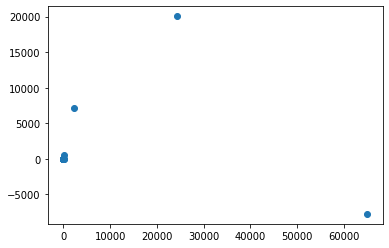

In [ ]:
plt.scatter(df_pca[:,0], df_pca[:,1])

Нормализируем данные для удобной визуализации

In [ ]:
scaler = StandardScaler()
df_pca_norm = scaler.fit_transform(df_pca)

<Figure size 432x288 with 0 Axes>

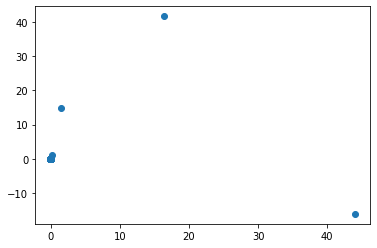

In [ ]:
plt.scatter(df_pca_norm[:,0], df_pca_norm[:,1])

In [ ]:
outliers = df_pca_norm[data_index]

3 аномалии видны сразу по графику

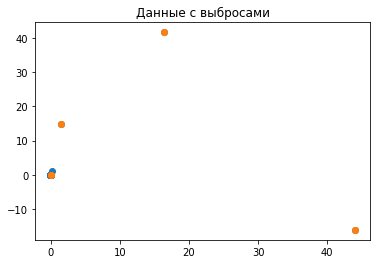

In [ ]:
plt.scatter(df_pca_norm[:,0], df_pca_norm[:,1])
plt.scatter(outliers[:,0], outliers[:,1])
plt.title("Данные с выбросами")
plt.show()

In [ ]:
print(np.mean(df_pca_norm[:,0]), np.mean(df_pca_norm[:,1]))

6.430251002353848e-18 -2.5319113321768275e-17


Увеличим масштаб в обсласти нуля, так как средние находятся в его области

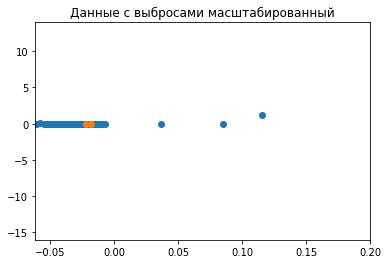

In [ ]:
plt.scatter(df_pca_norm[:,0], df_pca_norm[:,1])
plt.scatter(outliers[:,0], outliers[:,1])
plt.xlim([np.min(df_pca_norm[:,0]), 0.2])
plt.ylim([np.min(df_pca_norm[:,1]), 14])
plt.title("Данные с выбросами масштабированный")
plt.show()